In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

In [28]:
df = pd.read_csv(filepath_or_buffer="./data/googleplaystore.csv")
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


#### Getting the shape of data

In [3]:
df.shape

(10841, 13)

#### Info of the dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


##### Only the Rating feature is numeric in nature and rest all are as of now categorical fetaures.

#### Summary of the dataset

In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Rating,9367.0,4.193338,0.537431,1.0,4.0,4.3,4.5,19.0


#### Let's find out missing values

In [6]:
df.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

## Cleaning of the dataset

#### 1. Review

In [7]:
df["Reviews"].unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'], dtype=object)

In [8]:
df["Reviews"].str.isnumeric().sum()

10840

##### The number of reviews which are numeric are 10840 but the total number of data points are 10841. So, there is one data point which is not numeric. Let's have a look at that.

In [9]:
df[~df["Reviews"].str.isnumeric()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [10]:
df_copy = df.copy()
df_copy = df_copy.drop(df_copy.index[10472])
df_copy[~df_copy["Reviews"].str.isnumeric()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


#### Now converting this Review feature to int

In [11]:
df_copy["Reviews"] = df_copy["Reviews"].astype(int)

In [12]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int32  
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), int32(1), object(11)
memory usage: 1.1+ MB


#### 2. Size

In [13]:
df_copy["Size"].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

##### Let's convert the M to K. Thus 19M will become 19000K. And we replace the "K" with blank so that all the values are within the same range.

In [14]:
df_copy[df["Size"] == 'Varies with device']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
37,Floor Plan Creator,ART_AND_DESIGN,4.1,36639,Varies with device,"5,000,000+",Free,0,Everyone,Art & Design,"July 14, 2018",Varies with device,2.3.3 and up
42,Textgram - write on photos,ART_AND_DESIGN,4.4,295221,Varies with device,"10,000,000+",Free,0,Everyone,Art & Design,"July 30, 2018",Varies with device,Varies with device
52,Used Cars and Trucks for Sale,AUTO_AND_VEHICLES,4.6,17057,Varies with device,"1,000,000+",Free,0,Everyone,Auto & Vehicles,"July 30, 2018",Varies with device,Varies with device
67,Ulysse Speedometer,AUTO_AND_VEHICLES,4.3,40211,Varies with device,"5,000,000+",Free,0,Everyone,Auto & Vehicles,"July 30, 2018",Varies with device,Varies with device
68,REPUVE,AUTO_AND_VEHICLES,3.9,356,Varies with device,"100,000+",Free,0,Everyone,Auto & Vehicles,"May 25, 2018",Varies with device,Varies with device
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10713,My Earthquake Alerts - US & Worldwide Earthquakes,WEATHER,4.4,3471,Varies with device,"100,000+",Free,0,Everyone,Weather,"July 24, 2018",Varies with device,Varies with device
10725,Posta App,MAPS_AND_NAVIGATION,3.6,8,Varies with device,"1,000+",Free,0,Everyone,Maps & Navigation,"September 27, 2017",Varies with device,4.4 and up
10765,Chat For Strangers - Video Chat,SOCIAL,3.4,622,Varies with device,"100,000+",Free,0,Mature 17+,Social,"May 23, 2018",Varies with device,Varies with device
10826,Frim: get new friends on local chat rooms,SOCIAL,4.0,88486,Varies with device,"5,000,000+",Free,0,Mature 17+,Social,"March 23, 2018",Varies with device,Varies with device


In [15]:
df_copy["Size"] = df_copy["Size"].str.replace('M','000')
df_copy["Size"] = df_copy["Size"].str.replace('k','')
df_copy["Size"] = df_copy["Size"].replace('Varies with device',np.nan)
df_copy["Size"] = df_copy["Size"].astype(float)

##### We can later impute the null values with some meaningful value either by mean or median in Feature Engineering.

#### 3. Installs and Price

In [16]:
df_copy["Installs"].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [17]:
df_copy["Price"].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [18]:
chars_to_remove = ["+", "$", ","]
cols_to_clean = ["Installs", "Price"]

for char in chars_to_remove:
    for col in cols_to_clean:
        df_copy[col] = df_copy[col].str.replace(char, '')

In [19]:
df_copy["Price"].unique()

array(['0', '4.99', '3.99', '6.99', '1.49', '2.99', '7.99', '5.99',
       '3.49', '1.99', '9.99', '7.49', '0.99', '9.00', '5.49', '10.00',
       '24.99', '11.99', '79.99', '16.99', '14.99', '1.00', '29.99',
       '12.99', '2.49', '10.99', '1.50', '19.99', '15.99', '33.99',
       '74.99', '39.99', '3.95', '4.49', '1.70', '8.99', '2.00', '3.88',
       '25.99', '399.99', '17.99', '400.00', '3.02', '1.76', '4.84',
       '4.77', '1.61', '2.50', '1.59', '6.49', '1.29', '5.00', '13.99',
       '299.99', '379.99', '37.99', '18.99', '389.99', '19.90', '8.49',
       '1.75', '14.00', '4.85', '46.99', '109.99', '154.99', '3.08',
       '2.59', '4.80', '1.96', '19.40', '3.90', '4.59', '15.46', '3.04',
       '4.29', '2.60', '3.28', '4.60', '28.99', '2.95', '2.90', '1.97',
       '200.00', '89.99', '2.56', '30.99', '3.61', '394.99', '1.26',
       '1.20', '1.04'], dtype=object)

In [20]:
df_copy["Price"] = df_copy["Price"].astype(float)
df_copy["Installs"] = df_copy["Installs"].astype(int)

In [21]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int32  
 4   Size            9145 non-null   float64
 5   Installs        10840 non-null  int32  
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(3), int32(2), object(8)
memory usage: 1.1+ MB


#### 4. Last Updated

In [22]:
df_copy["Last Updated"].unique()

array(['January 7, 2018', 'January 15, 2018', 'August 1, 2018', ...,
       'January 20, 2014', 'February 16, 2014', 'March 23, 2014'],
      dtype=object)

In [23]:
df_copy["Last Updated"] = pd.to_datetime(df_copy["Last Updated"])
df_copy["Day"] = df_copy["Last Updated"].dt.day
df_copy["Month"] = df_copy["Last Updated"].dt.month
df_copy["Year"] = df_copy["Last Updated"].dt.year
df_copy.drop(labels=["Last Updated"], axis=1, inplace=True)

In [24]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int32  
 4   Size            9145 non-null   float64
 5   Installs        10840 non-null  int32  
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Current Ver     10832 non-null  object 
 11  Android Ver     10838 non-null  object 
 12  Day             10840 non-null  int32  
 13  Month           10840 non-null  int32  
 14  Year            10840 non-null  int32  
dtypes: float64(3), int32(5), object(7)
memory usage: 1.1+ MB


In [42]:
df_copy.to_csv(path_or_buf="./data/cleaned_googleplaystore.csv", index=False)

## EDA (Exploratory Data Analysis)

In [43]:
df = pd.read_csv(filepath_or_buffer="./data/cleaned_googleplaystore.csv", )
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver,Day,Month,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,1.0.0,4.0.3 and up,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2.0.0,4.0.3 and up,15,1,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,1.2.4,4.0.3 and up,1,8,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,Varies with device,4.2 and up,8,6,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,1.1,4.4 and up,20,6,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10835,Sya9a Maroc - FR,FAMILY,4.5,38,53000.0,5000,Free,0.0,Everyone,Education,1.48,4.1 and up,25,7,2017
10836,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6,100,Free,0.0,Everyone,Education,1.0,4.1 and up,6,7,2018
10837,Parkinson Exercices FR,MEDICAL,NaN,3,9.5,1000,Free,0.0,Everyone,Medical,1.0,2.2 and up,20,1,2017
10838,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,NaN,1000,Free,0.0,Mature 17+,Books & Reference,Varies with device,Varies with device,19,1,2015


#### 1. Let's find out if there are duplicates for App

In [44]:
df.duplicated("App").sum()

1181

##### So, there are 1181 duplicate data points. Let's drop them.

In [45]:
df.drop_duplicates(subset=["App"], keep="first", inplace=True)

In [46]:
df.shape

(9659, 15)

#### 2. Find number of numerical and categorical features

In [47]:
num_features = df.columns[df.dtypes != "object"]
cat_features = df.columns[df.dtypes == "object"]

print(f"The number of numerical features: {len(num_features)} and they are: {num_features}")
print(f"The number of categorical features: {len(cat_features)} and they are: {cat_features}")

The number of numerical features: 8 and they are: Index(['Rating', 'Reviews', 'Size', 'Installs', 'Price', 'Day', 'Month',
       'Year'],
      dtype='object')
The number of categorical features: 7 and they are: Index(['App', 'Category', 'Type', 'Content Rating', 'Genres', 'Current Ver',
       'Android Ver'],
      dtype='object')


#### 3. Proportion of count data on categorical columns

In [48]:
for col in cat_features:
    print(df[col].value_counts(normalize=True))
    print("==========================================")

App
Photo Editor & Candy Camera & Grid & ScrapBook    0.000104
Tic Tac CK                                        0.000104
INFAMY RO                                         0.000104
CK Call NEW                                       0.000104
Ck Coif                                           0.000104
                                                    ...   
Bike Race Free - Top Motorcycle Racing Games      0.000104
Dance School Stories - Dance Dreams Come True     0.000104
3D Bowling                                        0.000104
Mind Games Pro                                    0.000104
iHoroscope - 2018 Daily Horoscope & Astrology     0.000104
Name: proportion, Length: 9659, dtype: float64
Category
FAMILY                 0.189668
GAME                   0.099286
TOOLS                  0.085620
BUSINESS               0.043483
MEDICAL                0.040895
PERSONALIZATION        0.038927
PRODUCTIVITY           0.038720
LIFESTYLE              0.038203
FINANCE                0.035718
SPO

#### 4. Proportion of count data in numerical columns

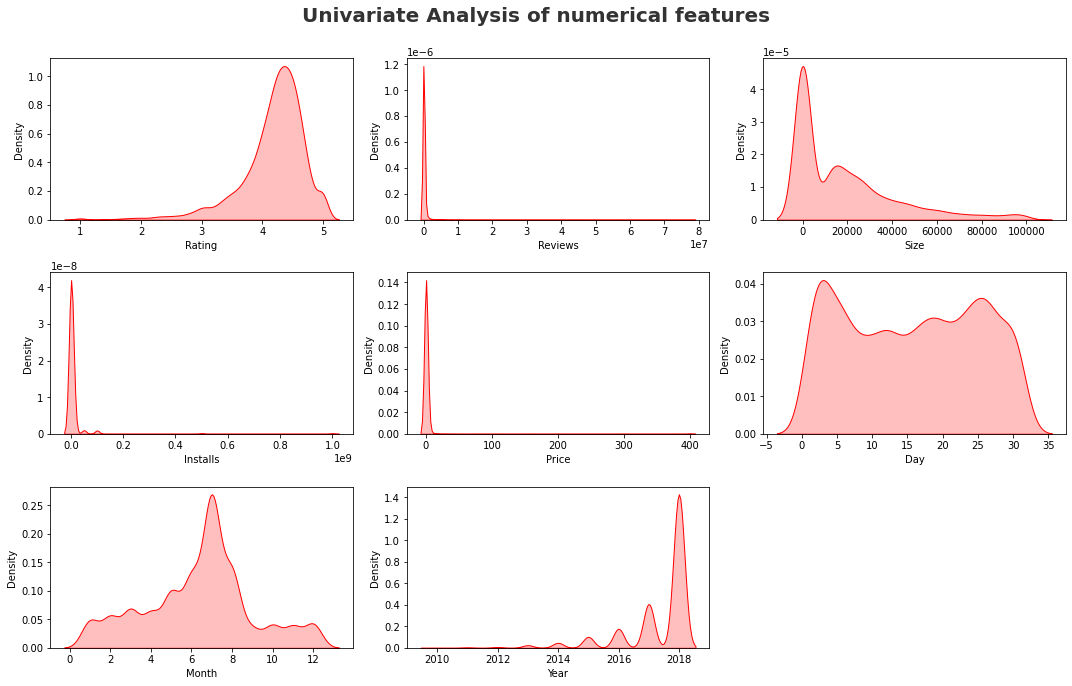

In [49]:
plt.figure(figsize=(15,15))
plt.suptitle(t="Univariate Analysis of numerical features", fontsize=20, fontweight="bold", alpha=0.8, y = 1.0)

for i in range(len(num_features)):
    plt.subplot(5, 3, i + 1)
    sns.kdeplot(data=df, x=num_features[i], shade=True, color='r')
    plt.xlabel(num_features[i])
    plt.tight_layout()

##### Year and Rating are left skewed while Revies, SIze, Installs and Price are right skewed. Only Month has a normal distribution. Since there is skewness in data, most probably there will be outliers present in the data as well.

#### Which is the most popular App category?

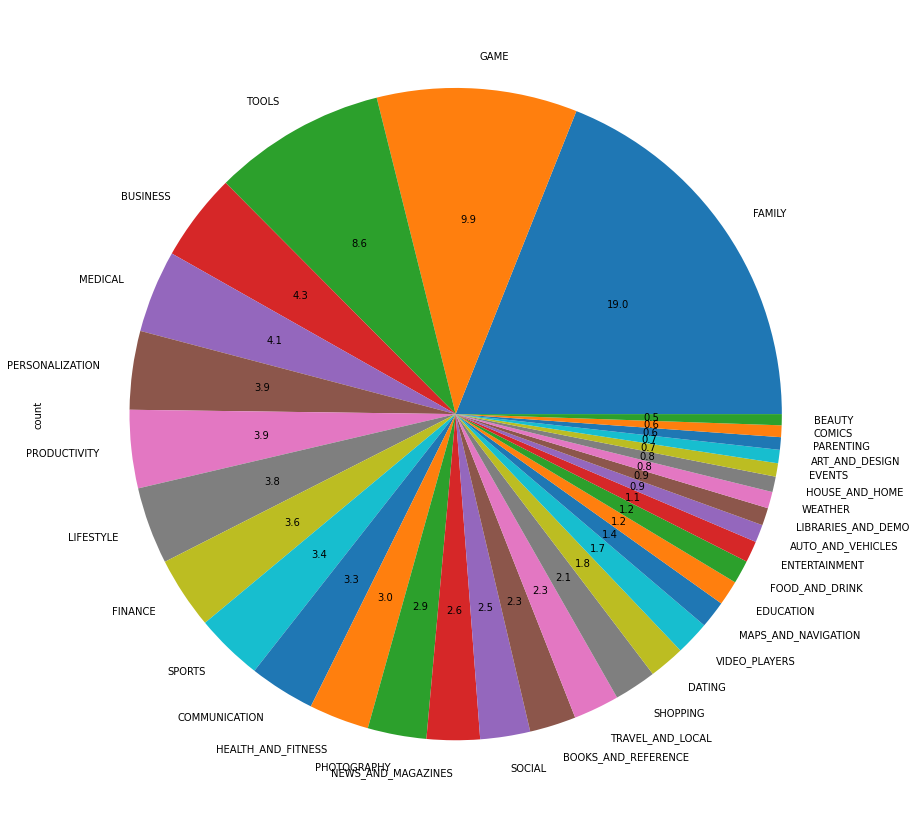

In [54]:
df["Category"].value_counts().plot.pie(y=df["Category"], figsize=(20,15),autopct="%1.1f")
plt.show()

##### 1. So, Family, Game and Tools are the most popular categories for this dataset.
##### 2. Beatuy, Comics, Parenting are among the least popular apps in Playstore.

#### Which category has largest number of installations?

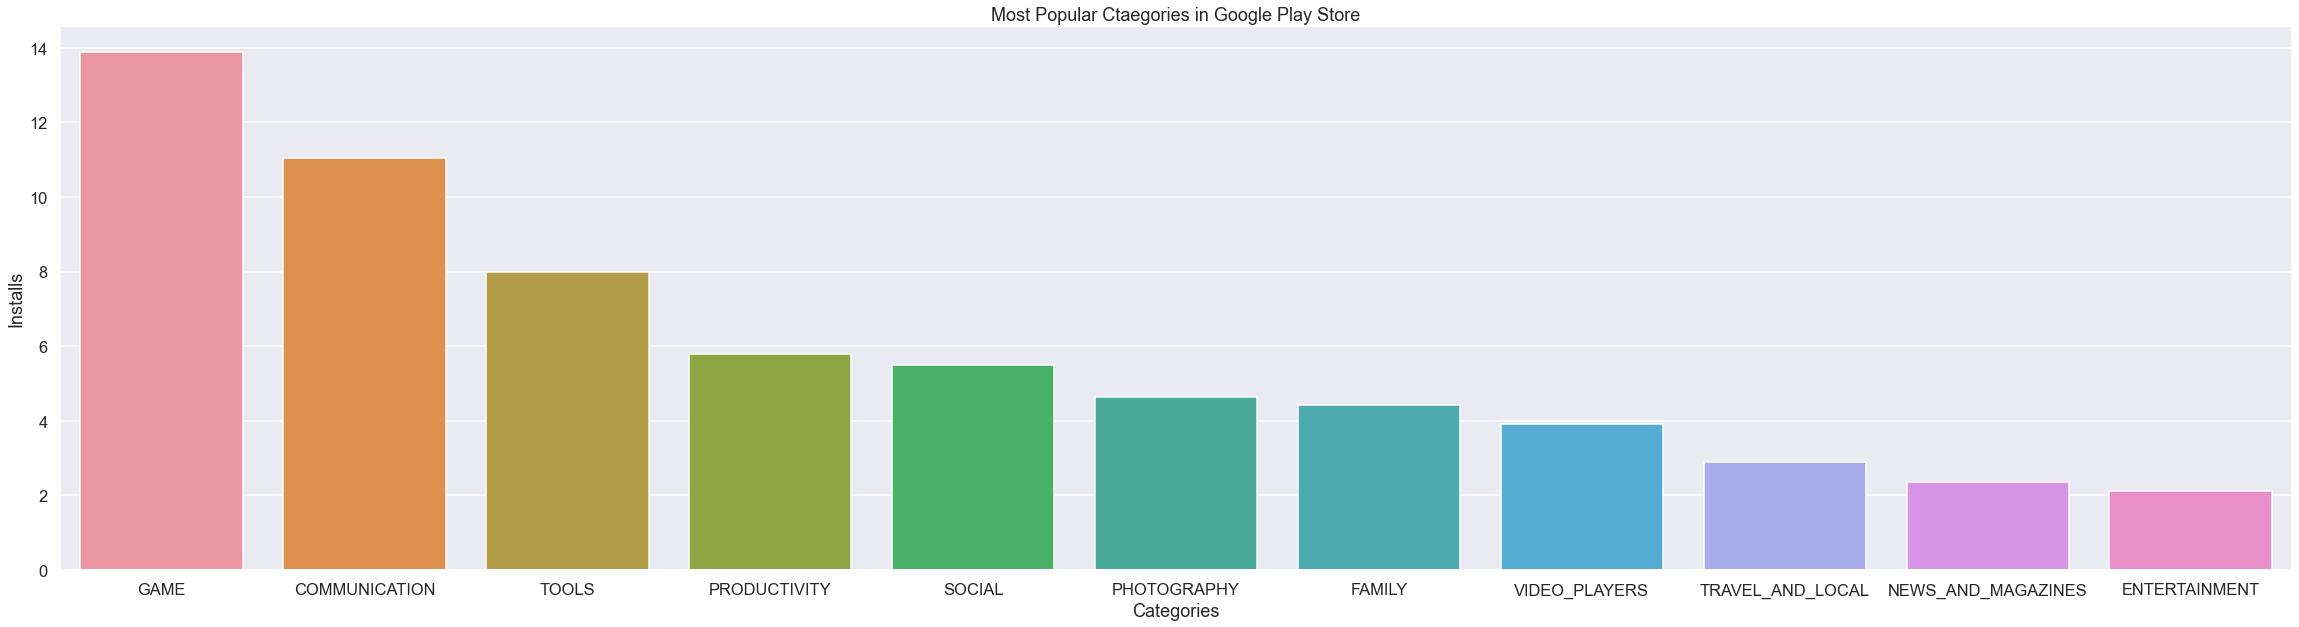

In [70]:
new_df = df.groupby(by=["Category"])["Installs"].sum().sort_values(ascending=False).reset_index()
new_df["Installs"] = new_df["Installs"] / 1000000000 # Converting to billions
new_df = new_df.loc[:10]

plt.figure(figsize=(40,10))
sns.set_context("talk")
sns.set_style("darkgrid")

sns.barplot(data=new_df, x="Category",y="Installs")
plt.xlabel("Categories")
plt.title("Most Popular Ctaegories in Google Play Store")
plt.show()

##### So, Game is the most popular category with the largest number of installation from Goolge Play Store.

#### What are the top 5 most installed Apps in each popular categories?

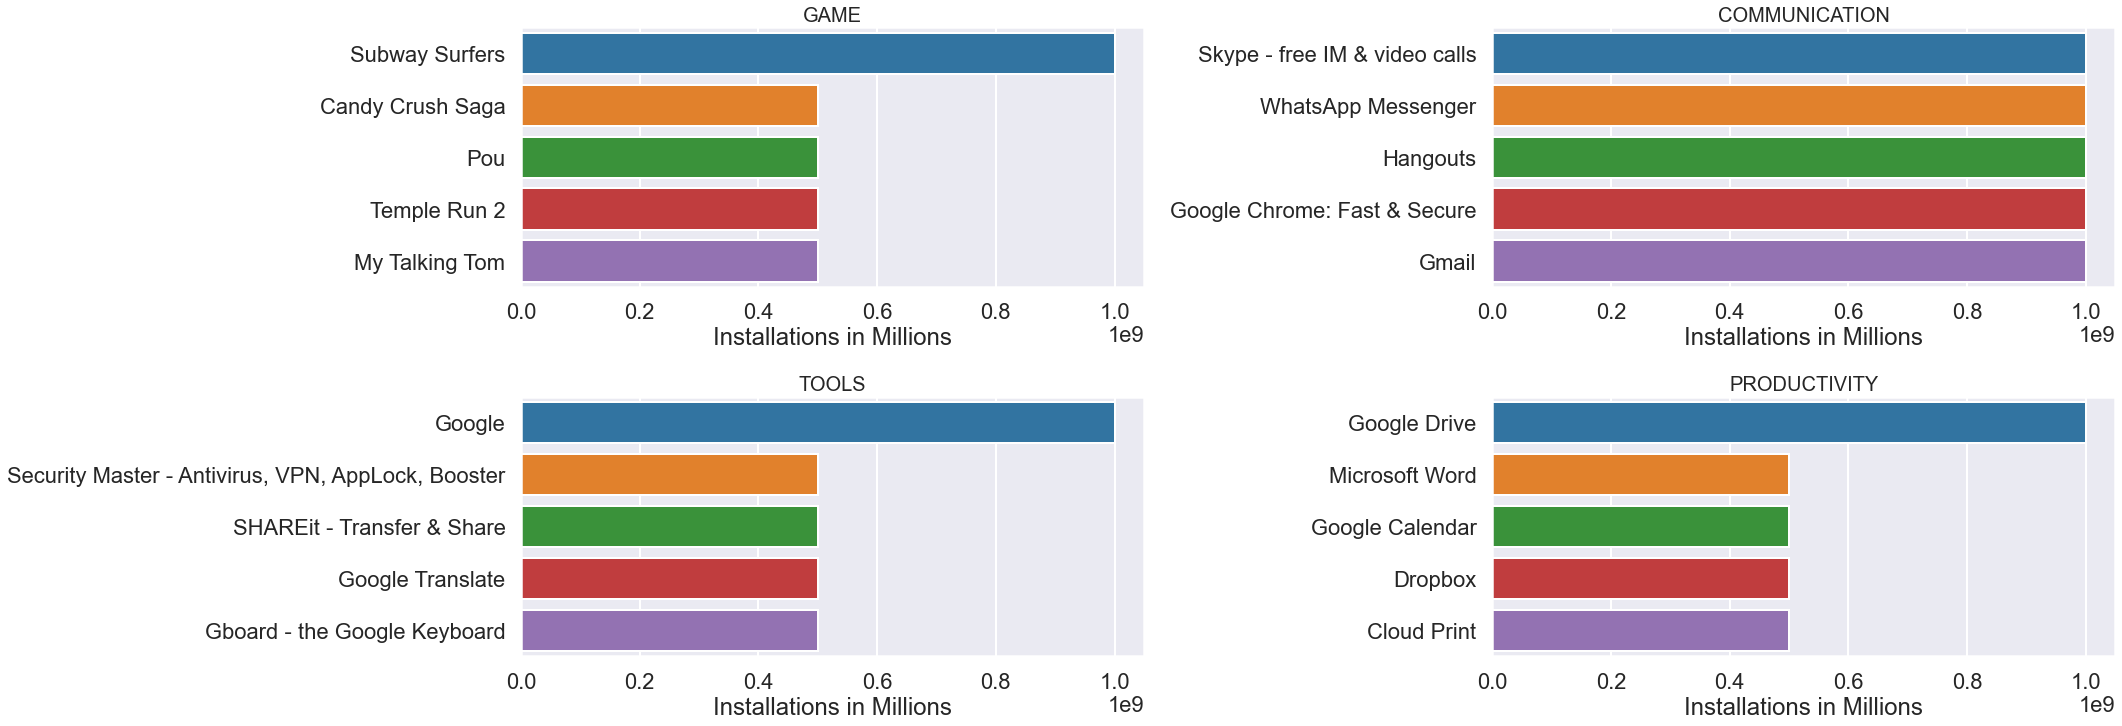

In [88]:
new_df = df.groupby(by=["Category", "App"])["Installs"].sum().reset_index()
new_df = new_df.sort_values(by="Installs", ascending=False)
top3_cat = ["GAME", "COMMUNICATION", "TOOLS", "PRODUCTIVITY"]
sns.set_context("poster")
sns.set_style("darkgrid")

plt.figure(figsize=(30,20))
for i, cat in enumerate(top3_cat):
    df_check = new_df[new_df["Category"] == cat]
    df_check = df_check.head(5)
    plt.subplot(4,2, i+1)
    sns.barplot(data=df_check, x="Installs",y="App")
    plt.xlabel("Installations in Millions")
    plt.ylabel("")
    plt.title(cat, size=20)
    
plt.tight_layout()
plt.show()

##### 1. Most popular Game app is Subway Surfers
##### 2. Most popular Communication app is Skype
##### 3. Most popular Tools app is Google
##### 4. Most popular Productivity app is Google Drive

#### How many apps are there on Google Play Store which get 5 ratings?

In [94]:
new_df = df[df["Rating"] == 5]
print("The number of 5 rated apps on Google Play Store are:", new_df.shape[0])

The number of 5 rated apps on Google Play Store are: 271
